In [1]:
!pip install numpy matplotlib seaborn opencv-python tensorflow scikit-learn

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
data = []
labels = []

for folder, label in [('brain_tumor_dataset/yes', 1), ('brain_tumor_dataset/no', 0)]:
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            data.append(img)
            labels.append(label)

# Numpy dizisine çevir ve normalleştir
data = np.array(data).reshape(-1, 128, 128, 1) / 255.0
labels = np.array(labels)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.5488 - loss: 0.6865 - val_accuracy: 0.7843 - val_loss: 0.5667
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7375 - loss: 0.5693 - val_accuracy: 0.7843 - val_loss: 0.5270
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8009 - loss: 0.4576 - val_accuracy: 0.8039 - val_loss: 0.5208
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8538 - loss: 0.3722 - val_accuracy: 0.8039 - val_loss: 0.5040
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8532 - loss: 0.4161 - val_accuracy: 0.8039 - val_loss: 0.4740
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8836 - loss: 0.3465 - val_accuracy: 0.8235 - val_loss: 0.4488
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8533 - loss: 0.3463 - val_accuracy: 0.8627 - val_loss: 0.4206
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8885 - loss: 0.2889 - val_accuracy: 0.8039 - val_loss: 0.4291

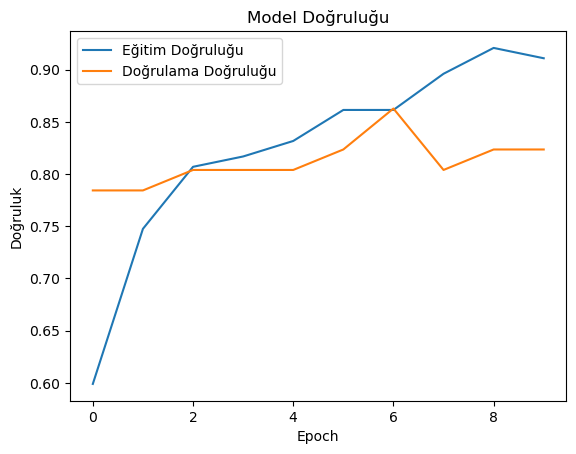

In [11]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Model Doğruluğu')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.78      0.93      0.85        27

    accuracy                           0.82        51
   macro avg       0.84      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51



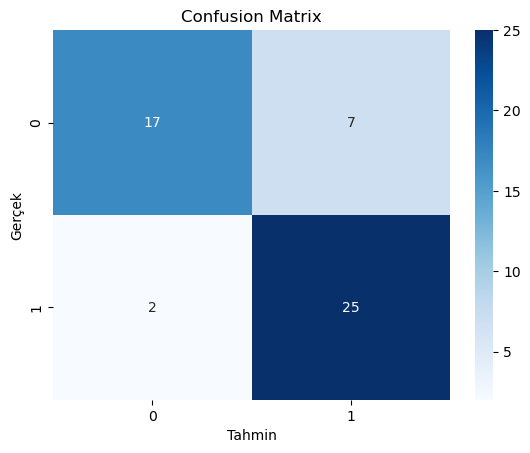

In [12]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()


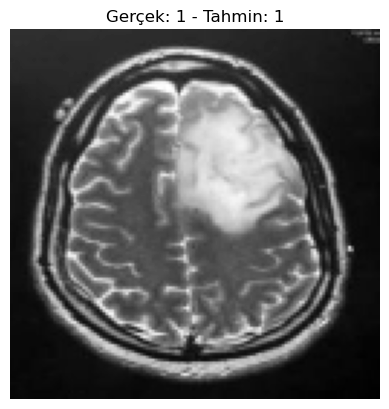

In [14]:
index = 22
plt.imshow(X_test[index].reshape(128, 128), cmap='gray')
plt.title("Gerçek: {} - Tahmin: {}".format(y_test[index], y_pred_class[index][0]))
plt.axis('off')
plt.show()
